<center>
<img src="logo.png" height="900"> 
</center>


#  Береги уровень значимости с молоду 

В этой тетрадке мы будем работать с данными про Баскетбол. 

In [3]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

В файле `basketball.tsv` лежит [статистика о штрафных бросках в играх в Баскетбол, собранная с сайта ESPN.com](https://www.kaggle.com/sebastianmantey/nba-free-throws)

In [4]:
df = pd.read_csv('basketball.tsv', sep='\t')
print(df.shape)
df.head( )

(618019, 13)


,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,command,is_home
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45,LAL,False
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45,LAL,False
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26,LAL,False
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26,LAL,False
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18,PHX,True


In [5]:
df.head().T

,0,1,2,3,4
end_result,106 - 114,106 - 114,106 - 114,106 - 114,106 - 114
game,PHX - LAL,PHX - LAL,PHX - LAL,PHX - LAL,PHX - LAL
game_id,2.61031e+08,2.61031e+08,2.61031e+08,2.61031e+08,2.61031e+08
period,1,1,1,1,1
play,Andrew Bynum makes free throw 1 of 2,Andrew Bynum makes free throw 2 of 2,Andrew Bynum makes free throw 1 of 2,Andrew Bynum misses free throw 2 of 2,Shawn Marion makes free throw 1 of 1
player,Andrew Bynum,Andrew Bynum,Andrew Bynum,Andrew Bynum,Shawn Marion
playoffs,regular,regular,regular,regular,regular
score,0 - 1,0 - 2,18 - 12,18 - 12,21 - 12
season,2006 - 2007,2006 - 2007,2006 - 2007,2006 - 2007,2006 - 2007
shot_made,1,1,1,0,1


__Описание колонок:__

* `end_result` - результат игры
* `game` - какие команды играли, команда справа - хозяин площадки
* `game_id` - уникальный id игры
* `period` - период
* `player` - имя игрока
* `playoff` - тип игры
* `score` - счёт после броска 
* `season` - сезон игры
* `shot_made` - попал или не попал в кольцо при броске 
* `time` - время броска 
* `command` - предполагаемая команда игрока (колонка рассчитана по датасету)
* `is_home` - домашний матч или в гостях

# 1. Доля попаданий в корзину

Немного посмотрим на наши данные. Ответьте на следующие вопросы и запишите ответы в соотвествующие переменные. 

Сколько уникальных игр было сыграно в течение всего периода, который есть в таблице (`ans1`)? Сколько в данных встречается уникальных игроков (`ans2`)?

In [12]:
print(df.game_id.nunique())
print(df.player.nunique())

12874
1098


In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans1 = df.game_id.nunique()
ans2 = df.player.nunique()

# your code here


In [14]:
# проверка того, что задание решено верно
assert ans1 == 12874

# Другие подобные тесты скрыты от вас

Подсчитайте по каждому игроку статистику, связанную с тем, как часто он попадет в корзину при бросках:

- Долю попаданий в корзину среди его бросков, $\hat{p}$
- Число бросков, которое было сделано игроком, $n$

Среди игроков, которые сделали более ста бросков, найдите самого успешного. Запишите его в переменную `ans3`.

In [17]:
players_stat = df\
                .groupby('player', as_index=False)\
                .agg({'shot_made': 'sum',
                      'period': 'count'})\
                .rename(columns={'shot_made': 'n_goals',
                                 'period': 'n_attempts'})

In [20]:
players_stat['accuracy'] = players_stat.n_goals / players_stat.n_attempts

In [25]:
players_stat\
            .query('n_attempts > 100')\
            .sort_values('accuracy', ascending=False)\


,player,n_goals,n_attempts,accuracy
977,Steve Nash,1454,1591,0.913891
129,Brian Roberts,307,337,0.910979
867,Ray Allen,1847,2045,0.903178
165,Chauncey Billups,2518,2793,0.901540
836,Peja Stojakovic,410,455,0.901099
...,...,...,...,...
93,Ben Wallace,340,837,0.406213
644,Kyrylo Fesenko,62,155,0.400000
42,Andre Drummond,552,1459,0.378341
192,Clint Capela,101,268,0.376866


In [26]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans3 = 'Steve Nash'

# your code here


In [27]:
# проверка того, что задание решено верно
assert ans3.split(' ')[0][-1] == 'e'
assert len(ans3.split(' ')[0]) == 5

# Другие подобные тесты скрыты от вас

Для поиска `ans4` и `ans5` используйте данные по игрокам, сделавшим более ста бросков.  

Найдите медиану распределения доли попаданий, запишите её в переменную `ans4`. Найдите значение коэффициента асимметрии, запишите его в переменную `ans5`. Какое значение он принимает? Правда ли, что распределение этой переменной оказывается скошенным?

Постройте гистограмму для доли попаданий игроков, нарисуйте на ней пунктирной линией медиану. Проинтерпретируйте то, что вы видите на рисунке.  

In [29]:
players_stat_100 = players_stat.query('n_attempts > 100').reset_index(drop=True)

In [30]:
players_stat_100.accuracy.median()

0.7568223240234471

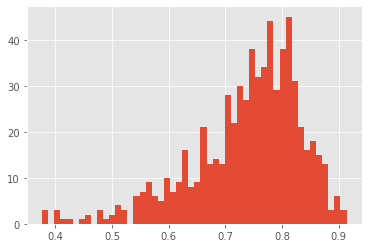

In [34]:
players_stat_100.accuracy.hist(bins=50)
plt.show()

In [41]:
mu_3 = ((players_stat_100.accuracy - players_stat_100.accuracy.mean())**3).mean()
std = players_stat_100.accuracy.std(ddof=0)

In [42]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans4 = players_stat_100.accuracy.median()
ans5 = mu_3/std**3

# your code here


In [43]:
# проверка того, что задание решено верно
assert ans4 > 0.7
assert ans5 < -1

# Другие подобные тесты скрыты от вас

# 2. Игры дома и в гостях

Проанализируем, как часто игроки попадают в корзину дома и как часто в гостях. Подсчитайте доли попаданий в корзину в гостях и дома для всех ироков из выборки. Если для какого-то игрока оказывается, что он всегда играл только дома/только в гостях, удалите его из выборки.

Проверьте гипотезу о равенстве этих долей для каждого игрока против двусторонней альтернативы. Число гипотез, которые отклоняются на уровне значимости $5\%$,  запишите в переменную `ans6`. 

In [80]:
stat_2 = df\
        .groupby(['player', 'is_home'], as_index=False)\
        .agg({'period': 'count',
              'shot_made': 'sum'})\
        .rename(columns={'period': 'n_attempts',
                         'shot_made': 'n_goals'})

stat_2['is_home'] = stat_2.is_home.map({False: 'away',
                                        True: 'home'})

stat_2 = stat_2\
            .pivot(index='player', columns='is_home')\
            .fillna(0)

stat_2.columns = ['_'.join(col) for col in stat_2.columns]

stat_2 = stat_2\
                .query('(n_attempts_away > 0) & (n_attempts_home > 0)')\
                .assign(accuracy_home=stat_2.n_goals_home / stat_2.n_attempts_home,
                        accuracy_away=stat_2.n_goals_away / stat_2.n_attempts_away)

stat_2.head()

,n_attempts_away,n_attempts_home,n_goals_away,n_goals_home,accuracy_home,accuracy_away
player,,,,,,
A.J. Price,150.0,132.0,115.0,96.0,0.727273,0.766667
Aaron Brooks,572.0,537.0,474.0,454.0,0.845438,0.828671
Aaron Gordon,134.0,120.0,92.0,81.0,0.675000,0.686567
Aaron Gray,147.0,192.0,91.0,98.0,0.510417,0.619048
Aaron Williams,26.0,14.0,20.0,12.0,0.857143,0.769231


In [81]:
from statsmodels.stats.proportion import proportions_ztest

In [82]:
def p_val(x):
    count = [x['n_goals_home'], x['n_goals_away']]
    n_obs = [x['n_attempts_home'], x['n_attempts_away']]
    value = 0
    alternative = 'two-sided'
    stat, pval = proportions_ztest(count, n_obs, value, alternative)
    return pval

In [84]:
stat_2['pval'] = stat_2.apply(p_val, axis=1)

In [86]:
sum(stat_2.pval < 0.05)

70

In [87]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans6 = sum(stat_2.pval < 0.05)
# ans6 = (dff.pvalue < 0.05).sum()

# your code here


In [88]:
# проверка того, что задание решено верно
assert ans6 < 100
assert ans6 > 60

# другие подобные тесты скрыты от вас

Введите коррекцию с помощью метода Холма. Запишите число гипотез, которые были отклонены на уровне значимости $5\%$, в переменную `ans7`.

In [89]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [92]:
rejected, p_corrected, _, _ = multipletests(stat_2['pval'].values, 
                                            alpha = 0.05, 
                                            method = 'holm') 
stat_2['pval_holm'] = p_corrected

In [93]:
sum(stat_2['pval_holm'] < 0.05)

0

In [94]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans7 = sum(stat_2['pval_holm'] < 0.05)
# ans7 = (dff.pholm < 0.05).sum()

# your code here


Введите коррекцию с помощью метода Бенжамини-Хохберга. Запишите число гипотез, которые были отклонены на уровне значимости $5\%$, в переменную `ans8`.

In [95]:
rejected, p_corrected, _, _ = multipletests(stat_2['pval'].values, 
                                            alpha = 0.05, 
                                            method = 'fdr_bh') 
stat_2['pval_bh'] = p_corrected

In [96]:
sum(stat_2['pval_bh'] < 0.05)

0

In [97]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans8 = sum(stat_2['pval_bh'] < 0.05)
# ans8 = (dff.pbh < 0.05).sum()

# your code here


In [98]:
# проверка того, что задание решено верно
assert ans7 < 10
assert ans8 < 10

# другие подобные тесты скрыты от вас

Объясните разницу, которую вы получили в количестве отклоненных гипотез. Предположим, что вы менеджер команды и вы хотите на основе статистики принять решение о том, какие игроки должны играть на поле в домашнем матче. Как вы будете его принимать? 

Отсортируйте таблицу по `pvalue`, полученному из самого первого теста. Посмотрите на самые большие и самые маленькие значения. Какое число наблюдений им соотвествуте? Как думаете, почему гипотезы для маленького числа наблюдений не отвергаются? Как это связано с ЗБЧ? Можно ли доверять этим результатам? Как их можно было бы решить при предобработке данных? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


# 3. Постоянство - признак мастерства

__Решение задач из этого пункта является не обязательным и никак не влияет на вашу оценку.__ 

В наших данных есть несколько сезонов. Постройте гистограмму с распределением числа игр по каждому году. Видна ли на гистограмме [аномалия, произошедшая в $2011$ году?](https://en.wikipedia.org/wiki/2011_NBA_lockout) 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


- Посчитайте для каждого игрока по каждому сезону долю попаданий в кольцо и количество сделанных бросков. 
- Оставьте в данных только те строки, где было сделано как минимум сто бросков. Удалите колонку с количеством сделанных бросков. 
- Методом `unstack("player")` вытащите индексы, отвечающие в группировке за игроков в названия столбцов. Методом `droplevel()` удалите все лишние заголовки таблицы.
- Удалите из данных всех игроков, у которых пропущена статистика хотя бы по одному сезону.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

shooting_per_season = ...

# your code here


In [ ]:
assert shooting_per_season.shape == (10, 27)

Посчтитайте для всех игроков стандартное отклонение их доли попаданий в динамике по сезонам. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


Постройте для $3$ самых непредсказуемых игроков и для трёх самых предсказуемых игроков динамику доли их попаданий по сезонам (по оси $x$ сезоны, по оси $y$ доля попаданий). 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


Каких игроков из представленных вы бы предпочли взять к себе в команду? Кому бы вы предпочли доверить делать штрафные броски? Почему? 

# 4. Эффект победителя

__Решение задач из этого пункта является не обязательным и никак не влияет на вашу оценку.__ 

__Гипотеза:__

> Если мы попали в корзину, сделав первый штрафной бросок, вероятность попасть при втором штрафном выше, чем если бы мы промахнулись.

Проверим эту гипотезу. 

- Создадим в исходной таблице колонку `shot_made_previous` методом `shift()`. В ней будет записан результат предыдущего броска. Данные отсортированы по времени.
- Извлечём из данных в таблицу `winner_effect` все строки, где в колонке `play` находится одна из записей: `"2 of 2", "2 of 3", "3 of 3"`. Каждая из них означает, что предыдущий бросок был сделан успешно. Этот же срез выбросит из таблицы все строки, где сдвиг, сделанный в предыдущем пункте, привёл к появлению некорректных записей.  

In [ ]:
df["shot_made_previous"] = df.shot_made.shift()

winner_effect = df[(df.play.str.contains("2 of 2")) | \
                   (df.play.str.contains("2 of 3")) | 
                   (df.play.str.contains("3 of 3"))]

По аналогии с пунктом $2$ найдите вероятность попасть в корзину при условии, что первый бросок был успешен, и вероятность попасть, при условии, что первый бросок был неуспешен. 

- Всех игроков с оценкой только одной из вероятностей удалите из данных.
- Всех игроков, у которых было меньше $10$ успешных первых бросков либо проваленных первых бросков, также удалите.

Для каждого игрока проверьте гипотезу о том, что эти две вероятности совпадают. Используйте уровень значимости $5\%$. Для коррекции уровня значимости используйте методы Холма и Бенжамини-Хохберга. Для скольких игроков гипотеза об эффекте победителя не отвергается?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


Посмотрите на таблицу значимых по Бенжамини-Хохбергу эффектов. Какие из них на ваш взгляд являются существенными? Не допустили ли мы в этих ситуациях ошибку второго рода?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


В свободное время посмотрите фильм ["Человек, который изменил всё"](https://www.kinopoisk.ru/film/432791/) про спортивных скаутов. В нём играет молодой Брэд Пит, а ещё он про статистику.

<center>
<img src="https://img3.goodfon.ru/original/2026x1236/1/68/moneyball-bratt-pitt-actor.jpg" width="700"> 
</center>
